In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

In [37]:
attendance = pd.read_csv('K_Leauge_1_2024_Attendance.csv')
stats = pd.read_csv('Stats.csv')

In [38]:
attendance

,Matchday,Home,Away,Month,Day,Date of the week,Attendance
0,1,Ulsan HD FC,Pohang Steelers,3,1,Fri,28683
1,1,Jeonbuk Hyundai Motors,Daejeon Hana Citizen,3,1,Fri,24758
2,1,Incheon United,Suwon FC,3,2,Sat,15060
3,1,Gangwon FC,Jeju SK,3,2,Sat,6021
4,1,Gwangju FC,FC Seoul,3,2,Sat,7805
...,...,...,...,...,...,...,...
223,38,Gangwon FC,Pohang Steelers,11,23,Sat,11426
224,38,Gimcheon Sangmu,FC Seoul,11,23,Sat,5943
225,38,Daegu FC,Incheon United,11,24,Sun,11812
226,38,Daejeon Hana Citizen,Jeju SK,11,24,Sun,12743


In [39]:
stats

,Player,Month,Day,Goal,Assist
0,Son,3,2,1,0
1,Son,3,10,1,2
2,Son,3,16,0,0
3,Son,3,21,1,0
4,Son,3,26,1,0
...,...,...,...,...,...
70,Lee,10,28,0,0
71,Lee,11,3,0,0
72,Lee,11,7,0,0
73,Lee,11,10,2,1


In [40]:
attendance_stats = pd.DataFrame({'총 관중수':attendance.groupby(by=['Month'])['Attendance'].sum(), '평균 관중수':attendance.groupby(['Month'])['Attendance'].mean()})
stats_sum = pd.DataFrame({'Goals':stats.groupby(by=['Month']).sum()['Goal'], 'Assists':stats.groupby(by=['Month']).sum()['Assist']})
stats_sum['Total_stats'] = stats_sum['Goals']+stats_sum['Assists']

In [41]:
attendance_stats

,총 관중수,평균 관중수
Month,,
3,341811,14242.125000
4,297509,9597.064516
5,346383,9896.657143
6,297609,9920.300000
7,286850,9561.666667
8,247202,11771.523810
9,260660,12412.380952
10,182998,10166.555556
11,247519,13751.055556


Text(0.5, 1.0, '월별 총 관중 수 그래프')

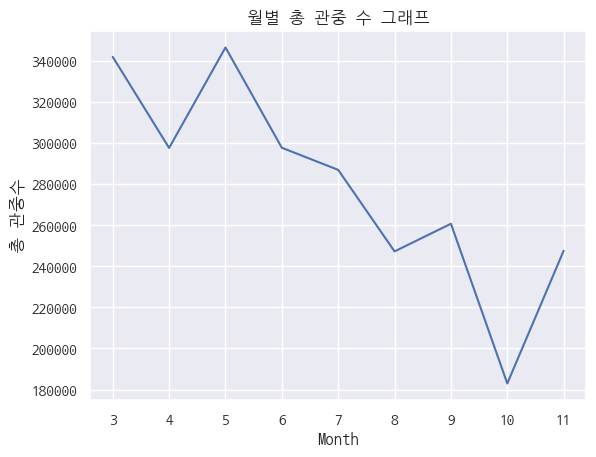

In [42]:
sns.lineplot(attendance_stats['총 관중수']).set_title("월별 총 관중 수 그래프")

Text(0.5, 1.0, '월별 평균 관중 수 그래프')

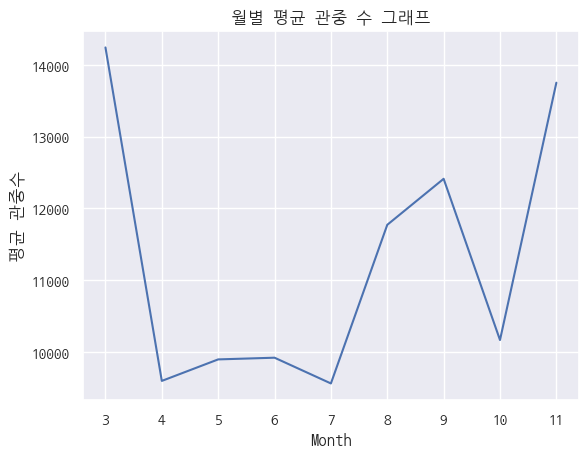

In [43]:
sns.lineplot(attendance_stats['평균 관중수']).set_title("월별 평균 관중 수 그래프")

Text(0.5, 1.0, '월별 스탯 그래프')

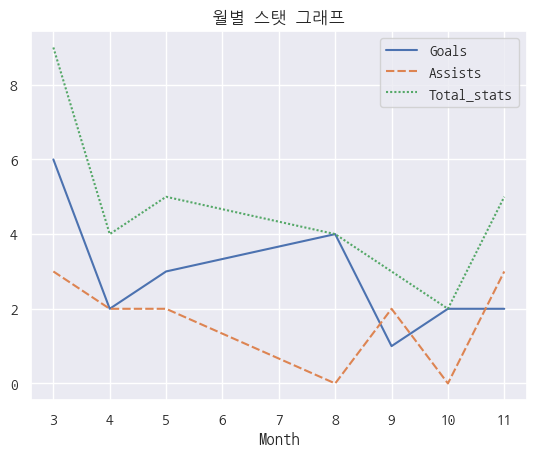

In [44]:
sns.lineplot(stats_sum).set_title("월별 스탯 그래프")

Text(0.5, 1.0, '월별 경기 수')

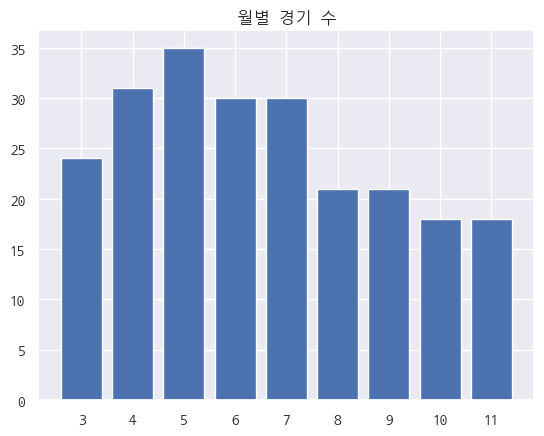

In [49]:
plt.bar(['3','4','5','6','7','8','9','10','11'], attendance['Month'].value_counts().sort_index())
plt.title('월별 경기 수')

### 주요 사항
<b>언론 노출도를 고려해 유명선수들의 스탯만 수집</b><br>
손흥민, 황희찬, 이강인 선수의 데이터를 수집<br>
김민재도 인지도는 충분하나 수비수 특성 상 스탯비교가 힘들 것 같아 제외<br>

<b>고려할 점</b><br>
6월부터 8월까지는 유럽 축구가 휴식기에 돌입하므로 이점을 고려해서 봐야할 것 같음<br>
어떤 팀들간의 경기가 펼쳐지는지도 매우 중요<br>
K리그에서 평균 관중수가 높은 인기팀(FC 서울, 울산 HD FC, 전북 현대 모터스)의 경기 일정 고려<br>
K리그에서 관심도가 높은 매치(울산 vs 전북, 울산 vs 포항, 서울 vs 인천 등이 언제 있는 지 고려)<br>
경기장마다 수용인원이 다르기때문에 어느 경기장에서 경기가 펼쳐지는지도 중요(같은 매치업이라도 경기장에 따라 인원수의 차이가 극명하게 날 수 있음)<br>
9월, 10월, 11월에는 A매치(국가대표) 경기가 진행<br>
유럽파 선수 스탯 수집한 75 경기 중 25경기에서 골 or 어시스트 기록<br>

### 월별 통계
<b>3월</b><br>
3월은 개막시즌이기도 하고 울산vs포항, 서울vs인천, 울산vs전북 등 인기팀들의 더비매치가 많음<br>

<b>4월</b><br>
4월부터 7월까지 평균 관중수가 매우 낮음<br>
4월, 5월에는 경기수가 많아 총 관중수는 많이 집계<br>
개막 후 관심도 하락과 빅매치의 부재로 평균 관중수가 낮아진 것 같음<br>

<b>5월</b><br>
5월 4일 서울vs울산 경기 52,000명 관람<br>

<b>6월</b><br>
6월부터 시작해서 8월까지 K리그의 관중 동원력이 급속하게 떨어짐<br>
6월, 7월은 경기 수도 적고 평균 관중수도 적음<br>

<b>8월~9월</b><br>
8월부터 9월까지 평균 관중 수 반등<br>
총 관중 수가 적은 건 경기 수 자체가 적어서 그런 것 같음<br>

<b>10월</b><br>
10월에는 K리그에서 가장 관중 동원력이 좋은 팀인 FC서울의 홈경기가 한 경기도 없음<br>
월별 경기수를 보니 후반으로 갈 수록 경기수가 적어지는 점도 고려해야할 것 같음<br>

<b>11월</b><br>
11월에는 총 관중수는 적지만 평균 관중 수는 3월 이후 가장 높음<br>
경기 수가 적어서 총 관중수가 적은 것 같음<br>
시즌 말 우승 경쟁 & 강등 경쟁으로 인한 관심도 상승인 것 같음<br>

### 결론
해외파 선수들의 활약과 K리그 관중 수에는 큰 영향이 없는 것 같음<br>
K리그 시청자라면 몰라도 경기장에 찾아가는 관중이라면 기본적으로 K리그에 애정이 있는 사람들이므로 해외파 선수들의 활약 여부에 큰 영향을 받지 않는 것 같음<br>
해외파 선수들의 활약보다는 어떤 경기(더비 매치)가 어디서(주요 경기장 ex.상암, 빅크라운 등) 펼쳐지는 지가 더 중요한 듯함